In [77]:
#importnado bibliotecas que foram usadas
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from   sklearn.linear_model import LinearRegression
from   sklearn.metrics import r2_score

import scipy.stats as stats

In [78]:
#adicionando a base de dados utilizados no programa para fazer a regressão

dados_df = pd.read_excel("Base de Dados Adap.xlsx")
dados = pd.read_excel("wage_train.xlsx")


In [79]:
#Rodando as estatisticas descritivas de todos os dados
dados.describe()

,Index,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,16279.500000,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,9399.406719,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,8139.750000,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,16279.500000,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,24419.250000,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,32559.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [80]:
#apresentado o shape dos dados
dados.shape

(32560, 16)

In [81]:
#listando as frequencias de aparições dos países
dados["native_country"].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

<AxesSubplot:>

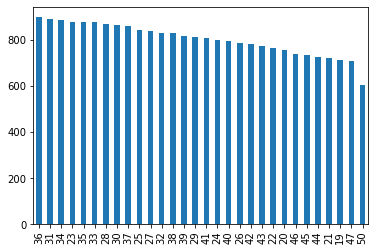

In [82]:
#criando um plot para a distribuição das 30 idades mais frequentes
dados["age"].value_counts()[:30].plot(kind="bar")

<AxesSubplot:>

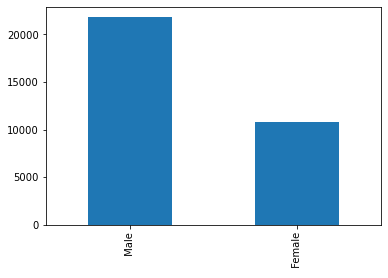

In [83]:
#criando um plot das distrbuições dos sexos
dados["sex"].value_counts().plot(kind="bar")

<AxesSubplot:>

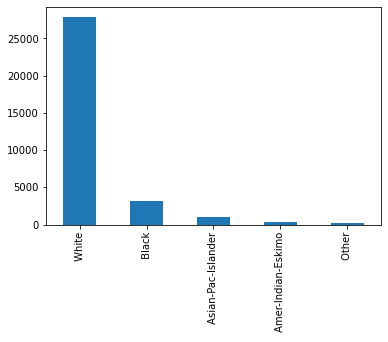

In [94]:
#criando um plot das distrbuições das "raças" ou etnias da pesquisa
dados["race"].value_counts().plot(kind="bar")

<AxesSubplot:>

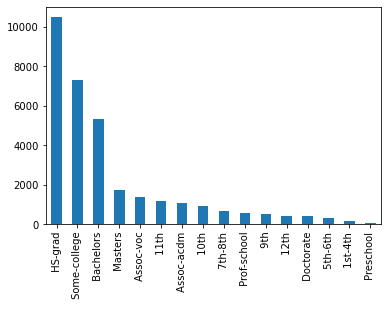

In [84]:
#criando um plot das educações
dados["education"].value_counts().plot(kind="bar")

<AxesSubplot:>

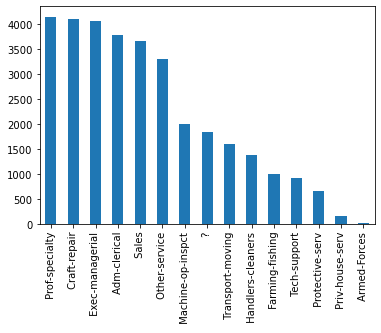

In [85]:
#Criando um plot das ocupações
dados["occupation"].value_counts().plot(kind="bar")

In [86]:
#definindo y para simplificar a escrita, que é a variável independente e tirando a coluna Index, que é o número de linhas
#E retirando o Yealy-wage pois ele não entra na regressão como variável independente (ele é a variável dependente)
Y = 'yearly_wage'

dados_df_X = dados_df.drop([Y,'Index'],axis=1)
dados_df_X = sm.add_constant(dados_df_X)


In [87]:
#Rodando a regressão com minimos quadrados ordinários

modelo = sm.OLS(dados_df[Y],dados_df_X)
res = modelo.fit(cov_type='HC1')
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:            yearly_wage   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     1236.
Date:                Sat, 23 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:17:34   Log-Likelihood:                -11401.
No. Observations:               30724   AIC:                         2.283e+04
Df Residuals:                   30709   BIC:                         2.296e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.5836      0.012    -50.

In [88]:
#Salvando os coeficientes encontrados na regressão
coef = res.params

#criando um valor para a constante
const = coef['const']
#retirando a constante do vetor de coeficientes
coef = coef.drop('const',axis=0)



In [89]:
#adicionando o arquivo para realizar a previsão.
prev = pd.read_excel("wage_test.xlsx")
display(prev)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,38,0,89814,1,9,1,0,0,0,0,0,0,50,0
1,28,1,336951,1,12,1,2,0,0,0,0,0,40,0
2,44,0,160323,2,10,1,1,0,1,0,7688,0,40,0
3,18,1,103497,2,10,0,1,0,0,1,0,0,30,0
4,34,0,198693,0,6,0,0,1,0,0,0,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,39,0,215419,1,13,0,1,1,0,1,0,0,36,0
16276,64,1,321403,1,9,0,1,0,1,0,0,0,40,0
16277,38,0,374983,1,13,1,1,0,0,0,0,0,50,0
16278,44,0,83891,1,13,0,0,0,1,0,5455,0,40,0


In [90]:
#multiplicando os dados pelos coeficientes e depois somando para chegar em um valor abaixo ou acima de 1
Y1 = prev * coef
soma = Y1.sum(axis=1) 
display(soma)



0        0.912470
1        1.131249
2        1.054696
3        0.596216
4        0.435827
           ...   
16275    0.802711
16276    0.782674
16277    1.179454
16278    0.837454
16279    1.157148
Length: 16280, dtype: float64

In [91]:
#Transformando os dados abaixo ou igual a 1, em <=50K e os acima em >50K finalizando a Previsão que foi pedido
a = " <=50K"
b =  ">50K"

for i in range(16280):
    if soma[i] <= 1:
        soma[i] = a
    else:
        soma[i] = b
display(soma)

0         <=50K
1          >50K
2          >50K
3         <=50K
4         <=50K
          ...  
16275     <=50K
16276     <=50K
16277      >50K
16278     <=50K
16279      >50K
Length: 16280, dtype: object

In [92]:
#Baixando os dado em Excel, está comentado pois os dados já estão no repositório entregue.
#soma.to_excel('Resultado Final.xlsx')